We are going to run the PCA test and KMeans clustering on the Automobile Data Set'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data' in this task.

1. Extract these six attributes of the data set: 'curb-weight','engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'.

2. Clean the extracted data, remove all missing values.

3. Run PCA on the data set and visualize the result with pre-defined labels to examinate any clear clusters.

4. Run the KMeans algorithm with the k value same as the pre-defined labels chosen in the previous step. To see how well the KMeans works, visualize the results on the same plot from the PCA results.

5. Compare how the data are clustered in both approaches.

In [ ]:
#Cleaning the data

In [1]:
import pandas as pd

In [99]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
columns = ['symboling', 
           'normalized-losses', 
           'make',
           'fuel-type',
           'aspiration',
           'num-of-doors',
           'body-style',
           'drive-wheels',
           'engine-location',
           'wheel-base', 
           'length',
           'width',
           'height',
           'curb-weight',
           'engine-type',
           'num-of-cylinders',
           'engine-size',
           'fuel-system',
           'bore',
           'stroke',
           'compression-ratio',
           'horsepower',
           'peak-rpm',
           'city-mpg',
           'highway-mpg',
           'price']
df = pd.read_csv(url, names=columns, na_values='?')

In [100]:
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [122]:
data = df[['curb-weight','engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price']]
labels = df[['drive-wheels']]
data.info()
data.head()

    drive-wheels
0            rwd
1            rwd
2            rwd
3            fwd
4            4wd
..           ...
200          rwd
201          rwd
202          rwd
203          rwd
204          rwd

[205 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
curb-weight    205 non-null int64
engine-size    205 non-null int64
horsepower     203 non-null float64
city-mpg       205 non-null int64
highway-mpg    205 non-null int64
price          201 non-null float64
dtypes: float64(2), int64(4)
memory usage: 9.7 KB


,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
0,2548,130,111.0,21,27,13495.0
1,2548,130,111.0,21,27,16500.0
2,2823,152,154.0,19,26,16500.0
3,2337,109,102.0,24,30,13950.0
4,2824,136,115.0,18,22,17450.0


In [123]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 6 columns):
curb-weight    199 non-null int64
engine-size    199 non-null int64
horsepower     199 non-null float64
city-mpg       199 non-null int64
highway-mpg    199 non-null int64
price          199 non-null float64
dtypes: float64(2), int64(4)
memory usage: 10.9 KB


/Users/aleex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)
pd.DataFrame(data).head()

,0,1,2,3,4,5
0,-0.015486,0.076255,0.202967,-0.652776,-0.539128,0.031609
1,-0.015486,0.076255,0.202967,-0.652776,-0.539128,0.409187
2,0.514841,0.604493,1.350877,-0.963548,-0.685494,0.409187
3,-0.422391,-0.427972,-0.037293,-0.186619,-0.100029,0.088780
4,0.516770,0.220320,0.309749,-1.118934,-1.270959,0.528554


In [125]:
#PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [126]:
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.605815,-0.591388,0.077032,0.025304,0.195015,-0.060567
1,0.759106,-0.438550,0.095553,0.333928,0.199216,-0.050668
2,1.852174,-0.345347,0.570036,-0.275556,-0.238474,-0.116399
3,-0.209612,-0.405020,0.216718,0.399905,0.028469,0.000188
4,1.617345,-0.850842,-0.293113,0.276259,0.217254,0.095304
...,...,...,...,...,...,...
194,1.052035,0.099003,-0.331588,0.004510,-0.168799,-0.007346
195,2.181674,-0.338750,0.359218,-0.036218,-0.670716,-0.007441
196,2.480963,-0.079148,-0.061313,0.074273,0.296095,-0.024454
197,1.371471,0.716250,-0.819197,0.423931,-0.301412,0.366774


In [127]:
pca.explained_variance_ratio_

array([0.82340096, 0.09675577, 0.03985993, 0.02244649, 0.01385638,
       0.00368048])

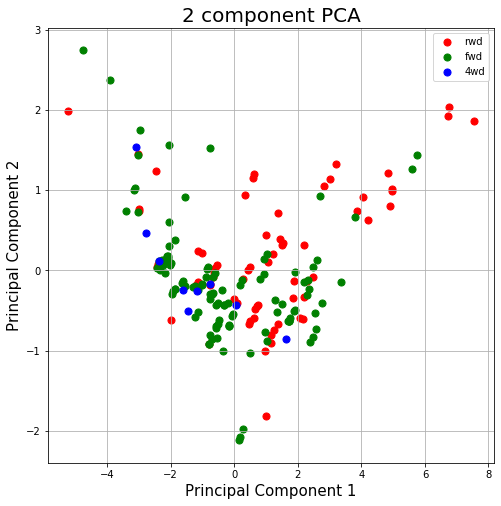

In [128]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
finalDf = pd.concat([principalDf, labels], axis = 1)
classes = df['drive-wheels'].unique()
colors = ['r', 'g', 'b']
for label, color in zip(classes, colors):
    indicesToKeep = finalDf['drive-wheels'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()

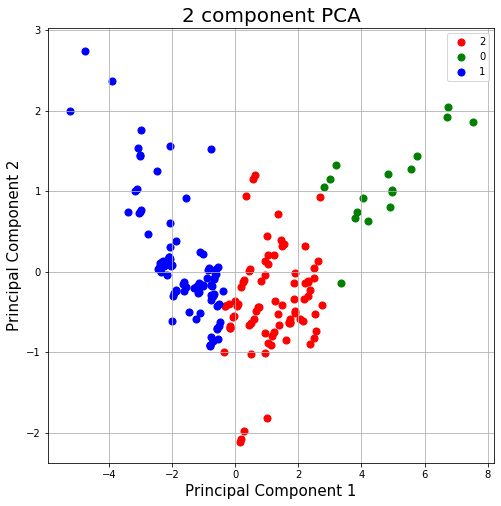

In [146]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3).fit(data)
labels = pd.Series(kmeans.labels_).rename('labels')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
finalDf = pd.concat([principalDf, labels], axis = 1)
classes = labels.unique()
colors = ['r', 'g', 'b']
for label, color in zip(classes, colors):
    indicesToKeep = finalDf['labels'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()